In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt

In [2]:
y, sr = lb.load('genres/rock/rock.00000.wav')
# y stores the audio wave
# sr stores the sampling rate
# these are the default values passed from the source file
# read the docs for more

In [3]:
y.shape

(661794,)

In [4]:
sr

22050

Text(0, 0.5, 'Amplitude')

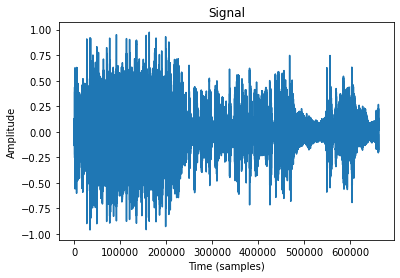

In [5]:
# Plotting the wave
plt.plot(y)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

Not getting enough information from above graph
<br>
FFT (Fast Fouruer Transform)
<br>
https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

In [6]:
# Fast fourier transform for audio signals


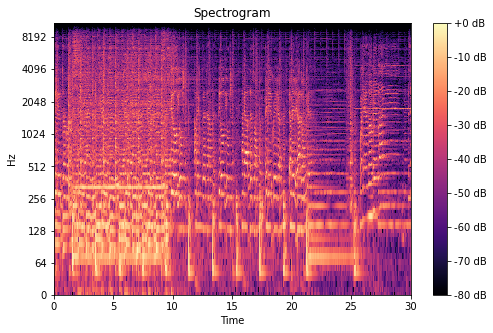

In [6]:
spectrogram = np.abs(lb.stft(y, hop_length=512))
spectrogram = lb.amplitude_to_db(spectrogram, ref=np.max) 

# Plotting the spectrogram
plt.figure(figsize=(8,5));
lb.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

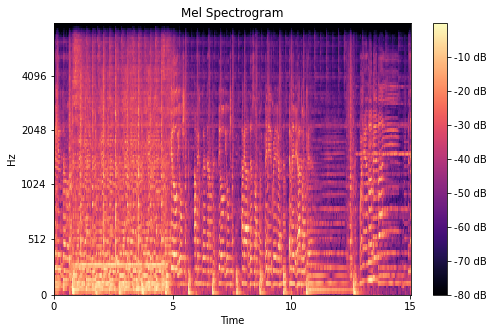

In [12]:
# https://developer.apple.com/documentation/accelerate/computing_the_mel_spectrum_using_linear_algebra

mspec = lb.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
# Using power_to_db as the values are very small without it
mspec = lb.power_to_db(mspec, ref=np.max)

# Plotting the mel spectrogram
plt.figure(figsize=(8,5))
lb.display.specshow(mspec, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [9]:
mspec

array([[-27.95934 , -34.706394, -30.291473, ..., -35.351826, -29.9364  ,
        -20.602947],
       [-29.213047, -26.416792, -19.059025, ..., -28.042963, -24.307222,
        -17.45627 ],
       [-37.638912, -28.666962, -22.538483, ..., -26.901093, -27.757032,
        -16.220917],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [186]:
def make_mel_spectrogram_df(directory):

    # Creating empty lists for mel spectrograms and labels
    labels = []
    mel_specs = []
    filename = []
    
    # Looping through each file in the directory
    for file in os.scandir(directory):
        
        # Loading in the audio file
        y, sr = librosa.core.load(file)
        
        # Extracting the label and adding it to the list
        label = str(file).split('.')[0][11:]
        labels.append(label)
        
        # Computing the mel spectrograms
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Adjusting the size to be 128 x 660
        # Padding of sorts, to make the shape of all the files the same size
        if spect.shape[1] != 660:
            spect.resize(128,660, refcheck=False)
        
        # Flattening to fit into dataframe and adding to the list
        spect = spect.flatten()
        mel_specs.append(spect)
        
        # Stores all the filenames in the array
        filename.append(file)
        

    # Converting the lists to arrays so we can stack them
    mel_specs = np.array(mel_specs)
    print(mel_specs.shape)
    labels = np.array(labels).reshape(100,1)
    filename = np.array(filename).reshape(100,1)
    
    # Create dataframe
    df = pd.DataFrame(np.hstack((filename, mel_specs,labels)))
    
    # Returning the mel spectrograms and labels
    return df

In [187]:
df = make_mel_spectrogram_df('genres/classical/')

(100, 84480)


Ectracting the mel spectrogram and storing it into an array, with the corresponding file names and the label(genre)
<br>
Then converted to and stored into a dataframe.

In [162]:
count = 0
genre = []
filenames = []
music_data = []
mel_dim = []
for subdir, dirs, files in os.walk('genres/'):
    for file in files:
        # print(os.path.join(subdir, file))
        # print(subdir)
        labels.append(subdir)
        filenames.append(files)
        # print(file)
        # audio_file = subdir + '/' + file
        # print(os.path.join(subdir, file))
        # print(audio_file)
        # y, sr = librosa.core.load(audio_file)
        # Loading the audio
        # Get the audio data and the sampling rate
        # Rename y to something better
        y, sr = lb.core.load(os.path.join(subdir, file))
        
        
        # Get mel spectrogram from the audio data usinf y and sr
        mel_spec = lb.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        # Change the scale to decibles
        mel_spec = lb.power_to_db(mel_spec, ref=np.max)
        
        # Get the shape of the mel_spec
        mel_dim.append(mel_spec.shape)
        
        # Converting into a 1d array using flatten
        # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
        mel_spec = mel_spec.flatten()
        music_data.append(mel_spec)
        
        
        count = count + 1
        
print('Files parsed: ', count)

# print(type(music_data))
# Converting list to array
music_data = np.array(music_data)
# print(type(music_data))
# print(music_data.shape)

print('Max dimension: ', max(mel_dim))

# Storing the data in a dataframe
df = pd.DataFrame(np.hstack((filenames, music_data, labels)))
        
# subdir will be the label
# rest of it will be the same
# file will be the file name

Files parsed:  1000
Max dimension:  (128, 660)


/tmp/ipykernel_5737/3342624073.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  music_data = np.array(music_data)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

The data is not of the same size
<br>
Adding 0s to the data that has smaller size than the max
<br>
The max dimension is 128x660
<br>
The same code but with rehapeing all the records to 128x660

In [14]:
count = 0
genre = []
filenames = []
music_data = []
mel_dim = []
labels = []
base_directory = 'genres/'
for subdir, dirs, files in os.walk(base_directory):
    for file in files:
        # print(os.path.join(subdir, file))
        # print(subdir)

        # print(file)
        # audio_file = subdir + '/' + file
        # print(os.path.join(subdir, file))
        # print(audio_file)
        # y, sr = librosa.core.load(audio_file)
        # Loading the audio
        # Get the audio data and the sampling rate
        # Rename y to something better
        y, sr = lb.core.load(os.path.join(subdir, file))
        
        
        # Get mel spectrogram from the audio data usinf y and sr
        mel_spec = lb.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        # Change the scale to decibles
        mel_spec = lb.power_to_db(mel_spec, ref=np.max)
        
        # Reshaping to 128x660, by adding 0
        if mel_spec.shape[1] != 660:
            mel_spec.resize(128,660, refcheck=False)
            
        # print(mel_spec.shape)
        
        
        # Converting into a 1d array using flatten
        # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
        mel_spec = mel_spec.flatten()
        music_data.append(mel_spec)
        
        
        count = count + 1
        # Storing the corresponding filename
        filenames.append(file)
        # labels, removing base_directory name from the labels
        labels.append(subdir.replace(base_directory, ''))
        
print('Files parsed: ', count)

# print(type(music_data))
# Converting list to array
music_data = np.array(music_data)
# print(type(music_data))
# print(music_data.shape)

# Reshapig the lists
labels = np.array(labels).reshape(count,1)
filenames = np.array(filenames).reshape(count,1)

        
# subdir will be the label
# rest of it will be the same
# file will be the file name

Files parsed:  1000


In [15]:
# Storing the data in a dataframe
df = pd.DataFrame(np.hstack((filenames, music_data, labels)))

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,84472,84473,84474,84475,84476,84477,84478,84479,84480,84481
0,blues.00000.wav,-27.95934,-34.706394,-30.291473,-31.983377,-34.71252,-18.91896,-20.786,-28.10627,-35.85604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
1,blues.00001.wav,-29.381193,-17.828934,-16.082321,-21.42917,-23.70478,-29.580908,-28.251745,-31.71809,-36.745407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
2,blues.00002.wav,-32.368137,-38.951023,-38.105515,-36.680084,-33.89211,-34.302193,-28.007008,-34.43401,-39.12656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
3,blues.00003.wav,-22.884243,-38.427704,-44.643795,-43.34305,-49.78785,-49.41929,-45.321747,-45.88495,-48.977386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues
4,blues.00004.wav,-52.681557,-53.033882,-52.625343,-54.882698,-45.236115,-44.02924,-50.053173,-53.21808,-59.152702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blues


In [18]:
df.to_csv('mel_spectrogram.csv')

Extra

In [220]:
count = 0
genre = []
filenames = []
music_data = []
mel_dim = []
labels = []
wow = True
base_directory = 'genres/'
for subdir, dirs, files in os.walk(base_directory):
    for file in files:
        
    
        
        
        count = count + 1
        
        filenames.append(file)
        labels.append(subdir.replace(base_directory, ''))


print(labels) 

        
        
print('Files parsed: ', count)

# print(music_data.shape)

# Reshapig the lists
filenames = np.array(filenames).reshape(count,1)
print(filenames.shape)
labels = np.array(labels).reshape(count,1)
print(labels.shape)


['disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop',